# <p style="background-color: #b30024; font-family: Blippo, fantasy; line-height: 1.3; font-size: 26px; letter-spacing: 3px; text-align: center; color: #ffeef1"> Análisis FIFA 2018 - Componentes Principales </p>

![](https://s.yimg.com/ny/api/res/1.2/sybAk0uKKJIlkVhfz5Jtuw--/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/http://media.zenfs.com/en-GB/homerun/uk.goal.com/42bf6d3fd31612f17e7b59c6260595db)





# <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Indice de temas</span>
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Componentes Principales](#3.-Componentes-principales)


##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Inicialización-del-entorno</span>

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300
pd.options.mode.chained_assignment = None

import numpy as np
np.set_printoptions(linewidth=400)

import re#, wget, os
!pip install adjustText
from adjustText import adjust_text

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))





distutils: /home/adalisa/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /home/adalisa/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=966a6543ffce78c36ded330960737570426ee0b49e3d7323b68a22e86b51e954
  Stored in directory: /home/adalisa/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
distutils: /home/adalisa/anaconda3/include/python3.7m/UNKNOWN
sysconfig: /home/adalisa/anaconda3/include/python3.7m
user = False
home = None
root = None
prefix = None
You should consider upgrading via the '/home/adalisa/anaconda3/bin/python -m pip install --upgrade pip' command.


##  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Preparación-de-los-datos</span>

In [3]:
players = pd.read_csv("CompleteDataset.csv",low_memory=False) #guessing dtypes for each column is very memory demanding
player_att = pd.read_csv("PlayerAttributeData.csv",low_memory=False) #to get att names easier
#players.iloc[::500, :]
#players.head(10)



##  <span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Datos nulos</span>

In [4]:
players_nulls = players[players.isnull().any(axis=1)]
print(players_nulls['Preferred Positions'].value_counts()[:5])

GK         2029
CB           36
ST           14
LB           13
CM CDM       10
Name: Preferred Positions, dtype: int64


Los jugadores con datos nulos parecen ser mayoritariamente arqueros. 

 <span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Creamos codificacion para las posiciones generales </span>

In [5]:
players["Preferred Positions 1"] = players["Preferred Positions"].apply(lambda x: re.findall('^([\w\-]+)', x)[0])
# Get first preferred position
# if fowards 0, midfield = 1, defender = 2, GK = 3
positions_map1 = {
 'CAM': 1,
 'CB': 2,
 'CDM': 2,
 'CF': 0,
 'CM': 1,
 'GK': 3,
 'LB': 2,
 'LM': 1,
 'LW': 0,
 'LWB': 2,
 'RB': 2,
 'RM': 1,
 'RW': 0,
 'RWB': 2,
 'ST': 0}

players["Preferred Positions int"] = players["Preferred Positions 1"].replace(positions_map1)



Ahora que creamos columnas con preferencias de juego codificadas, en vez de tirar los jugadores con datos faltantes, rellenamos esos datos por ceros.

In [6]:
players = players.fillna(0)

players[["Name","Preferred Positions","Preferred Positions 1","Preferred Positions int"]].head(20)

,Name,Preferred Positions,Preferred Positions 1,Preferred Positions int
0,Cristiano Ronaldo,ST LW,ST,0
1,L. Messi,RW,RW,0
2,Neymar,LW,LW,0
3,L. Suárez,ST,ST,0
4,M. Neuer,GK,GK,3
5,R. Lewandowski,ST,ST,0
6,De Gea,GK,GK,3
7,E. Hazard,LW,LW,0
8,T. Kroos,CDM CM,CDM,2
9,G. Higuaín,ST,ST,0


   <span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Creamos bases de atributos </span>

In [7]:
def get_attributes(players):
    attribute_names = player_att.columns[1:].values # all attribute names e.g. Acceleration, Aggresion, Agility etc.
    attribute_names = attribute_names[attribute_names!="ID"] # remove id not interested
    attributes = players[attribute_names] #get 
    attributes = attributes.apply(pd.to_numeric, errors='coerce', axis=0) #invalid parsing will be set as NaN
    attributes = attributes.fillna(0)
    return attributes, attribute_names

attributes, attribute_names = get_attributes(players)
position_col = players["Preferred Positions int"] # for coloring plot




In [8]:
attribute_names

array(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys'], dtype=object)

In [9]:

columns_needed = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes''Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

# attack attribute first, then defence, then mixed
columns_needed_rearranged = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']

df = attributes[columns_needed_rearranged]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Aggression          17981 non-null  float64
 1   Crossing            17981 non-null  float64
 2   Curve               17981 non-null  float64
 3   Dribbling           17981 non-null  float64
 4   Finishing           17981 non-null  float64
 5   Free kick accuracy  17981 non-null  float64
 6   Heading accuracy    17981 non-null  float64
 7   Long shots          17981 non-null  float64
 8   Penalties           17981 non-null  float64
 9   Shot power          17981 non-null  float64
 10  Volleys             17981 non-null  float64
 11  Short passing       17981 non-null  float64
 12  Long passing        17981 non-null  float64
 13  Interceptions       17981 non-null  float64
 14  Marking             17981 non-null  float64
 15  Sliding tackle      17981 non-null  float64
 16  Stan

  <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Miremos los atributos agrupados por referencia de posición de juego </span> 

Text(22, 100, 'Mixed Attributes')

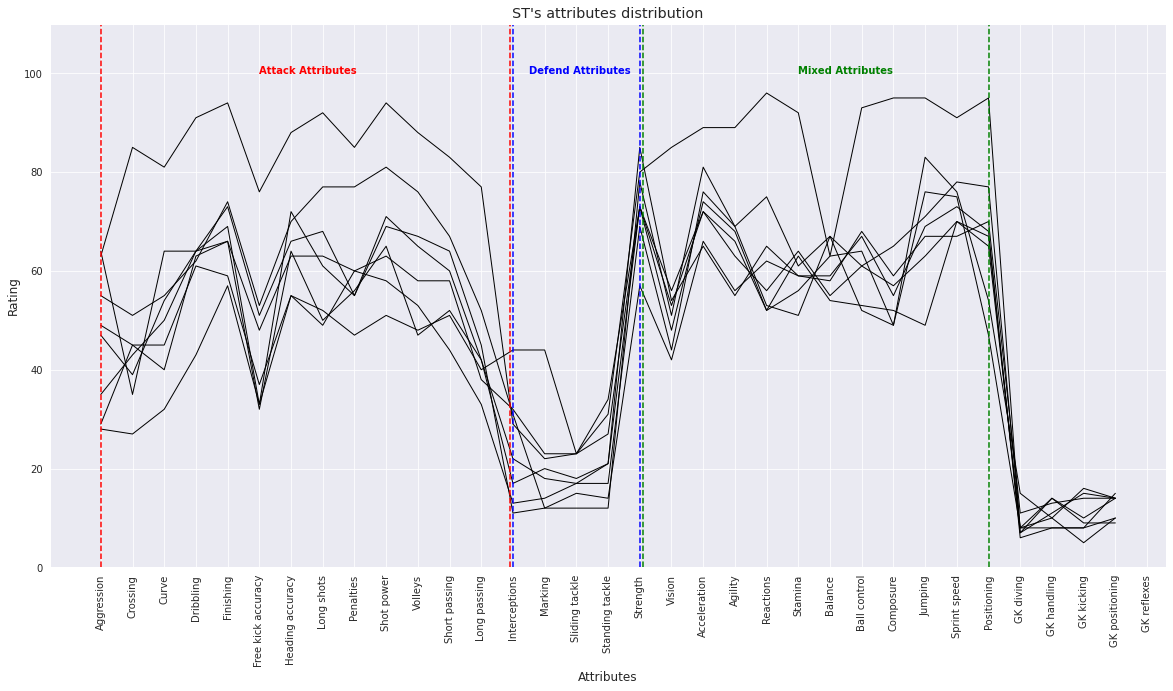

In [11]:
cols = columns_needed_rearranged
fig, ax = plt.subplots()
df_new_ST = df[players["Preferred Positions 1"] == 'ST'].iloc[::300,:-1]
#df_new_ST.T transpose de data to accomodate more lines
df_new_ST.T.plot.line(color = 'black', figsize = (20,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')

In [12]:
df_new_ST.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,Volleys,Short passing,Long passing,Interceptions,Marking,Sliding tackle,Standing tackle,Strength,Vision,Acceleration,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,GK diving,GK handling,GK kicking,GK positioning
0,63.0,85.0,81.0,91.0,94.0,76.0,88.0,92.0,85.0,94.0,88.0,83.0,77.0,29.0,22.0,23.0,31.0,80.0,85.0,89.0,89.0,96.0,92.0,63.0,93.0,95.0,95.0,91.0,95.0,7.0,11.0,15.0,14.0
2384,55.0,51.0,55.0,62.0,74.0,53.0,70.0,77.0,77.0,81.0,76.0,67.0,52.0,31.0,12.0,12.0,12.0,78.0,51.0,81.0,69.0,75.0,61.0,67.0,61.0,65.0,71.0,78.0,77.0,8.0,8.0,8.0,15.0
4940,64.0,35.0,64.0,64.0,69.0,33.0,72.0,61.0,55.0,71.0,65.0,60.0,42.0,22.0,18.0,17.0,21.0,85.0,54.0,65.0,55.0,65.0,59.0,58.0,68.0,59.0,67.0,67.0,70.0,11.0,13.0,14.0,14.0
7273,35.0,43.0,50.0,64.0,73.0,51.0,66.0,68.0,55.0,69.0,67.0,64.0,45.0,11.0,12.0,15.0,14.0,57.0,42.0,66.0,56.0,62.0,59.0,59.0,67.0,55.0,69.0,73.0,68.0,6.0,8.0,8.0,10.0
9878,47.0,39.0,54.0,64.0,66.0,48.0,63.0,63.0,60.0,63.0,58.0,58.0,38.0,32.0,23.0,23.0,27.0,73.0,53.0,72.0,63.0,56.0,64.0,55.0,61.0,57.0,63.0,70.0,65.0,8.0,14.0,10.0,14.0


 <span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Normalizado </span> 

In [13]:
#divido cada valor por la suma de los valores de la fila para 
df_new_ST_normalized = df_new_ST.div(df_new_ST.sum(axis=1), axis=0)
df_new_ST_normalized.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,Volleys,Short passing,Long passing,Interceptions,Marking,Sliding tackle,Standing tackle,Strength,Vision,Acceleration,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,GK diving,GK handling,GK kicking,GK positioning
0,0.027249,0.036765,0.035035,0.039360,0.040657,0.032872,0.038062,0.039792,0.036765,0.040657,0.038062,0.035900,0.033304,0.012543,0.009516,0.009948,0.013408,0.034602,0.036765,0.038495,0.038495,0.041522,0.039792,0.027249,0.040225,0.041090,0.041090,0.039360,0.041090,0.003028,0.004758,0.006488,0.006055
2384,0.030726,0.028492,0.030726,0.034637,0.041341,0.029609,0.039106,0.043017,0.043017,0.045251,0.042458,0.037430,0.029050,0.017318,0.006704,0.006704,0.006704,0.043575,0.028492,0.045251,0.038547,0.041899,0.034078,0.037430,0.034078,0.036313,0.039665,0.043575,0.043017,0.004469,0.004469,0.004469,0.008380
4940,0.038624,0.021123,0.038624,0.038624,0.041642,0.019916,0.043452,0.036814,0.033193,0.042849,0.039228,0.036210,0.025347,0.013277,0.010863,0.010260,0.012674,0.051298,0.032589,0.039228,0.033193,0.039228,0.035607,0.035003,0.041038,0.035607,0.040435,0.040435,0.042245,0.006639,0.007846,0.008449,0.008449
7273,0.022336,0.027441,0.031908,0.040842,0.046586,0.032546,0.042119,0.043395,0.035099,0.044033,0.042757,0.040842,0.028717,0.007020,0.007658,0.009572,0.008934,0.036375,0.026803,0.042119,0.035737,0.039566,0.037652,0.037652,0.042757,0.035099,0.044033,0.046586,0.043395,0.003829,0.005105,0.005105,0.006382
9878,0.028941,0.024015,0.033251,0.039409,0.040640,0.029557,0.038793,0.038793,0.036946,0.038793,0.035714,0.035714,0.023399,0.019704,0.014163,0.014163,0.016626,0.044951,0.032635,0.044335,0.038793,0.034483,0.039409,0.033867,0.037562,0.035099,0.038793,0.043103,0.040025,0.004926,0.008621,0.006158,0.008621


Text(22, 0.07, 'Mixed Attributes')

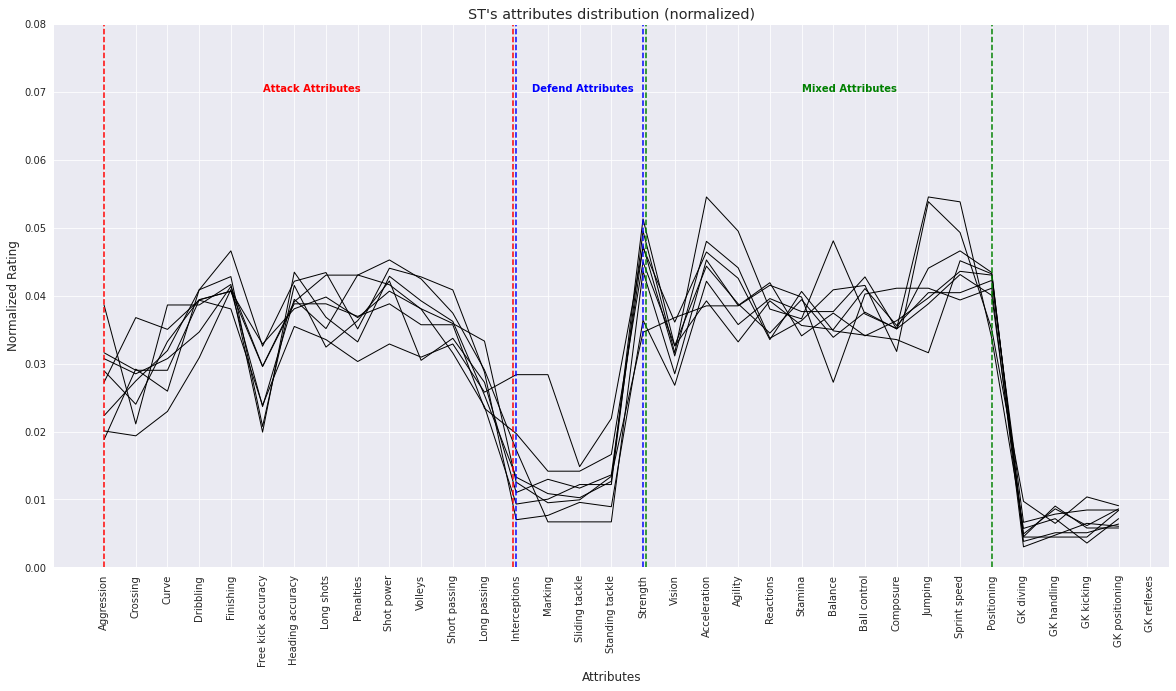

In [14]:

fig, ax = plt.subplots()
df_new_ST_normalized.T.plot.line(color = 'black', figsize = (20,10), ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(labels = cols, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(12.9, color='red', linestyle='--')

ax.axvline(13, color='blue', linestyle='--')
ax.axvline(17, color='blue', linestyle='--')

ax.axvline(17.1, color='green', linestyle='--')
ax.axvline(28, color='green', linestyle='--')

ax.text(5, 0.07, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(13.5, 0.07, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 0.07, 'Mixed Attributes', color = 'green', weight = 'bold') 

 <span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Componentes Principales </span> 

 <span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024"> Correlacion de variables </span> 

<AxesSubplot:title={'center':'Pearson Correlation of Player attributes'}>

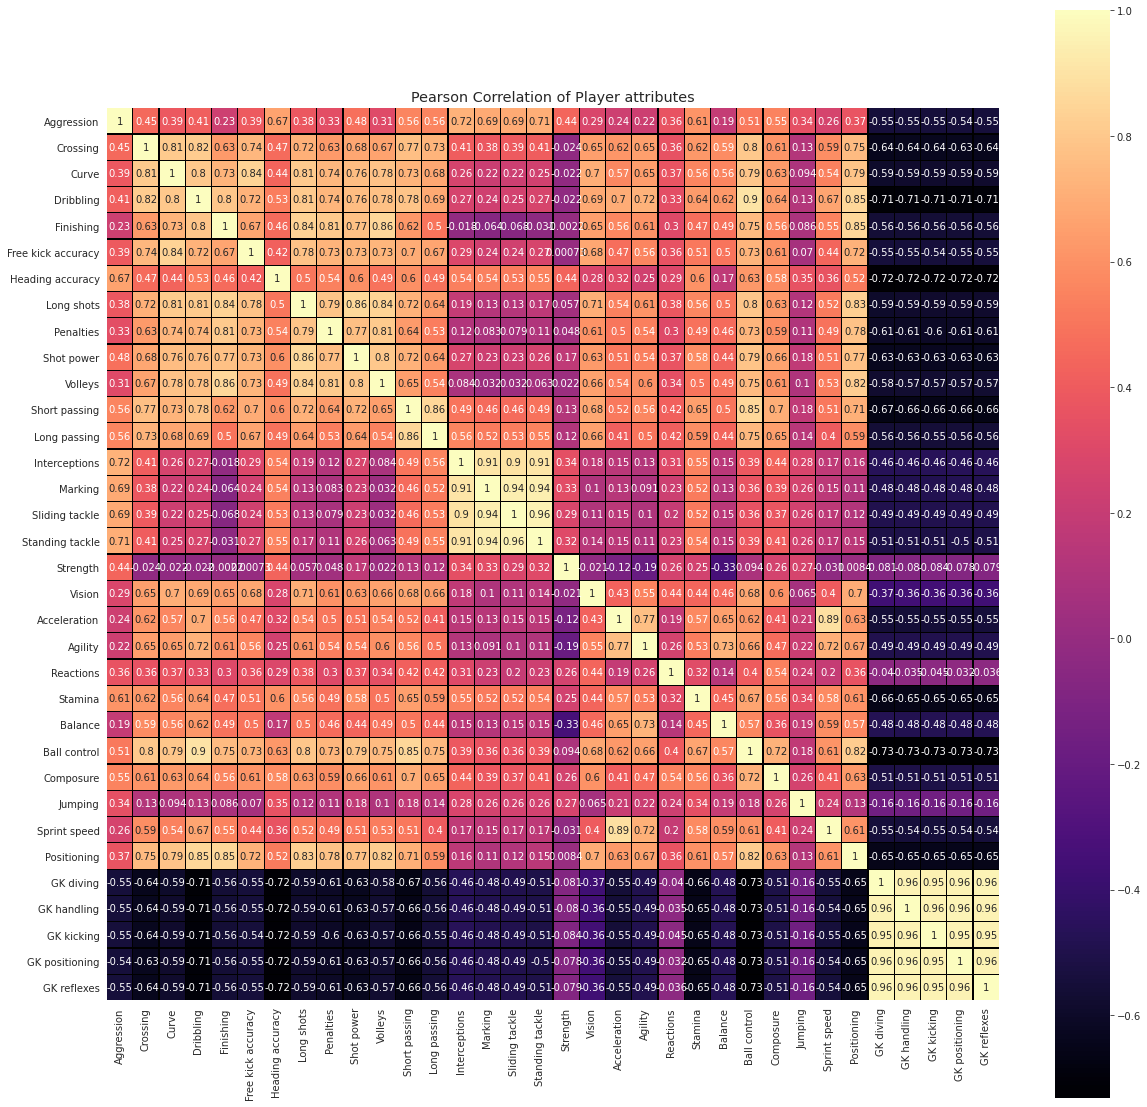

In [15]:

f, ax = plt.subplots(figsize=(20, 20))

plt.title('Pearson Correlation of Player attributes')

sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap = 'magma', linecolor='black', annot=True)

* Cada celda de la cuadrícula representa el valor del coeficiente de correlación entre dos variables.
* El valor en la posición (a, b) representa el coeficiente de correlación entre los elementos de la fila a y la columna b. Será igual al valor en la posición (b, a)
* Es una matriz cuadrada – cada fila representa una variable, y todas las columnas representan las mismas variables que las filas, de ahí el número de filas = número de columnas.
* Es una matriz simétrica – esto tiene sentido porque la correlación entre a,b será la misma que la de b,a.
Todos los elementos diagonales son 1. Dado que los elementos diagonales representan la correlación de cada variable consigo misma, siempre será igual a 1.
* Los marcadores de los ejes denotan el rasgo que cada uno de ellos representa.
* Un valor positivo grande (cercano a 1,0) indica una fuerte correlación positiva, es decir, si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.
* Un valor negativo grande (cercano a -1,0) indica una fuerte correlación negativa, es decir, que el valor de una de las variables disminuye al aumentar el de la otra y viceversa.
* Un valor cercano a 0 (tanto positivo como negativo) indica la ausencia de cualquier correlación entre las dos variables, y por lo tanto esas variables son independientes entre sí.
* Cada celda de la matriz anterior también está representada por sombras de un color. En este caso, los tonos más oscuros del color indican valores más pequeños, mientras que los tonos más brillantes corresponden a valores más grandes (cerca de 1). Esta escala se da con la ayuda de una barra de color en el lado derecho del gráfico.

<span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Estandarización </span>  

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

attributes_n=scaler.fit_transform(df)

<span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Cáculo de Componentes Principales con Scikit Learn </span>  

In [17]:

from sklearn.decomposition import PCA


pca = PCA().fit(attributes_n)

explained_variance=pca.explained_variance_ratio_

cum_var_exp = np.cumsum(explained_variance) # Cumulative explained variance

print(list(zip(range(34),cum_var_exp)))



[(0, 0.5311900361906376), (1, 0.6737463011127474), (2, 0.7423487516711195), (3, 0.7915571825581182), (4, 0.8314800219234563), (5, 0.8511904826889775), (6, 0.8656352806770758), (7, 0.8785838896880546), (8, 0.8889107861122076), (9, 0.8987659299605028), (10, 0.9075691305078333), (11, 0.9159175855738243), (12, 0.9238446980909327), (13, 0.9313975778539811), (14, 0.9386932908620864), (15, 0.9454626194891317), (16, 0.9516778876640875), (17, 0.9566174928551894), (18, 0.9614355858032522), (19, 0.9661049392736685), (20, 0.9703425251874117), (21, 0.9740358732633795), (22, 0.9775658520665115), (23, 0.980872000187442), (24, 0.9839502412308171), (25, 0.9869554914394646), (26, 0.9897516224281124), (27, 0.9919803228223661), (28, 0.9937569093717619), (29, 0.9952211377876877), (30, 0.9965391129747845), (31, 0.9977731180307421), (32, 0.9989298415740754), (33, 1.0000000000000002)]


 Entre la 15 y la 16 ya se tiene un 95% de varianza explicada.
 Las dos primeras un 65% de varianza explicada.
 
 Recordemos que quiere decir esto, la suma de las desviaciones estandard de las variables es igual a la suma de los autovalores de la matriz de Covarianza, por lo cual se dice varianza explicada por la componente al autovalor dividido por la suma de los autovalores, llamado traza de la matriz.  

<span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Varianza explicada </span>  

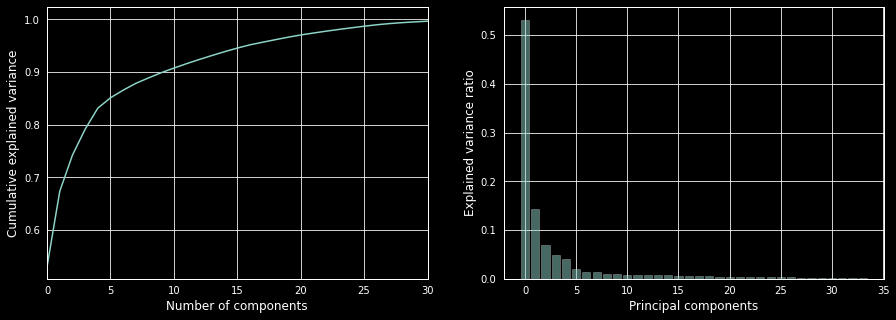

In [18]:
with plt.style.context('dark_background'):
    fig2, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) #components
    ax1.plot(cum_var_exp); ax1.set_xlim(0,30,1); ax1.set_xlabel('Number of components');ax1.set_ylabel('Cumulative explained variance');
    ax2.bar(range(34), explained_variance, alpha=0.5, align='center',
            label='individual explained variance'); ax2.set_ylabel('Explained variance ratio'); ax2.set_xlabel('Principal components')
plt.show()

<span style="font-family: Blippo, fantasy; font-size: 18px; font-weight: bold; letter-spacing: 3px; color: #b30024">Componentes principales para visualizar </span>  

Vamos a hacer dos pequeñas funciones para visualizar sin tener que poner todo el código. Una es el cáculo de las dos primeras componentes del archivo que querramos ver, y el segundo es el biplot.


In [19]:
def dim_reduction(x):
    dim_reduce = PCA(n_components=2) #dim reduction
    dim_reduce_fit = dim_reduce.fit_transform(x) 
    return dim_reduce, dim_reduce_fit

def biplot(dim_reduce,coeff,labels=None,color="blue",alpha=0.5):
    fig, ax = plt.subplots(figsize=(15,15))
    xs = dim_reduce[:,0]
    ys = dim_reduce[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #scalex = scaley = 1
    cax = ax.scatter(xs*scalex,ys*scaley,c = color, cmap=plt.get_cmap('magma'),alpha=0.35)
    arrow_scale = 1.0
    annotations = []
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0]*arrow_scale, coeff[i,1]*arrow_scale,color = 'red',linestyle="-",alpha=0.5)
        annotations.append(ax.text(coeff[i,0]*arrow_scale, coeff[i,1]*arrow_scale, labels[i], color = 'black', ha = 'left', va = 'top',fontsize=15))
    adjust_text(annotations)
    ax.set_xlabel("First component")
    ax.set_ylabel("Second component")
    return fig,cax



Uno de los grandes usos de las componentes es como ejes donde plotear. Este dataset es gigante, para inspección, lo ploteamos en estos dos ejes. Ahora vemos solo los atributos que elegimos en esas dos componentes, junto al biplot.

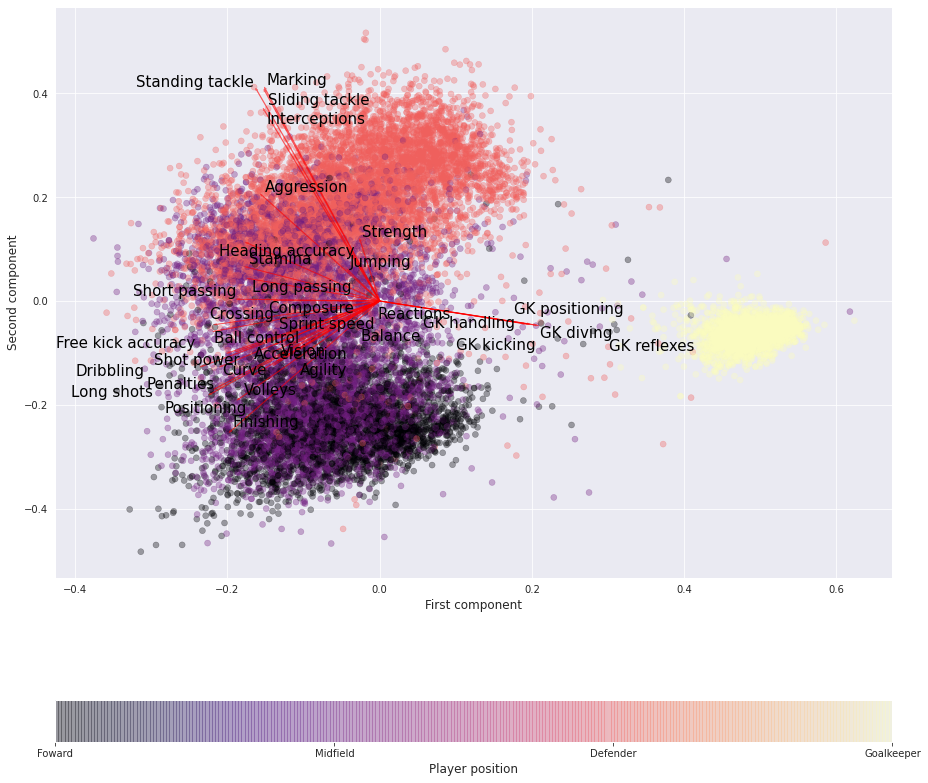

In [20]:
dim_reduce, dim_reduce_fit = dim_reduction(attributes)

fig,cax = biplot(dim_reduce_fit,np.transpose(dim_reduce.components_[0:2, :]),labels= attributes.columns.values,color=position_col)
cbar = fig.colorbar(cax, ticks=[0,1,2,3], orientation='horizontal')
cbar.ax.set_xticklabels(['Foward','Midfield','Defender',"Goalkeeper"])  # horizontal colorbar
cbar.set_label("Player position")
#plt.savefig("fifa_by_position.png")
plt.show()


<span style="font-family: Blippo, fantasy; font-size: 23px; font-weight: bold; letter-spacing: 3px; color: #b30024">Ejemplo  Removemos los arqueros y miramos las log wages (paga) </span> 

In [21]:
no_gks = players.loc[players["Preferred Positions 1"]!="GK"] # remove gks
position_col = no_gks["Preferred Positions int"] # for coloring plot
# attack attribute first, then defence, then mixed
columns_needed_rearranged = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning']

no_gks["Wage"] = no_gks["Wage"].replace('[\€K,]', '', regex=True).astype(float) # regex to get wage as float

no_gks["Wage log"] = no_gks["Wage"].apply(np.log) #log wages
no_gks["Wage log"] = no_gks["Wage log"].fillna(0)

no_gks["Wage log"][np.isinf(no_gks["Wage log"])] = 0 #some people have negative wages :S. set them to zero

attributes_g, attribute_names_g  = get_attributes(no_gks)


In [22]:
df = attributes_g[columns_needed_rearranged]
#df.info()

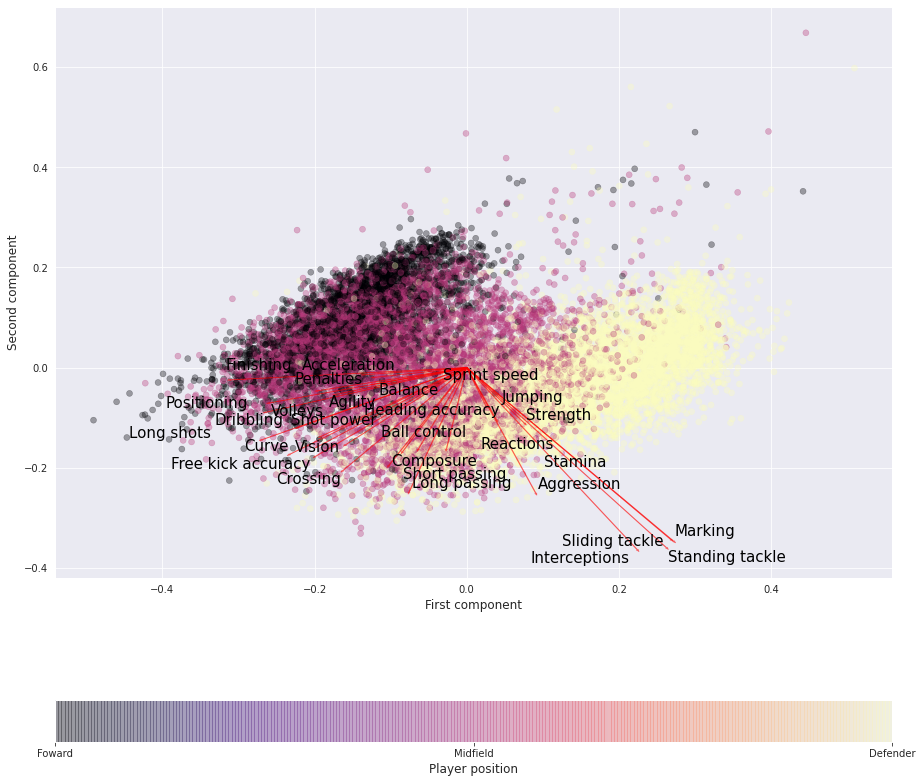

In [23]:


dim_reduce, dim_reduce_fit = dim_reduction(df)

fig,cax = biplot(dim_reduce_fit,np.transpose(dim_reduce.components_[0:2, :]),labels= df.columns.values,color=position_col)
cbar = fig.colorbar(cax, ticks=[0,1,2,3], orientation='horizontal')
cbar.ax.set_xticklabels(['Foward','Midfield','Defender',"Goalkeeper"])  # horizontal colorbar
cbar.set_label("Player position")
#plt.savefig("fifa_by_position.png")
plt.show()


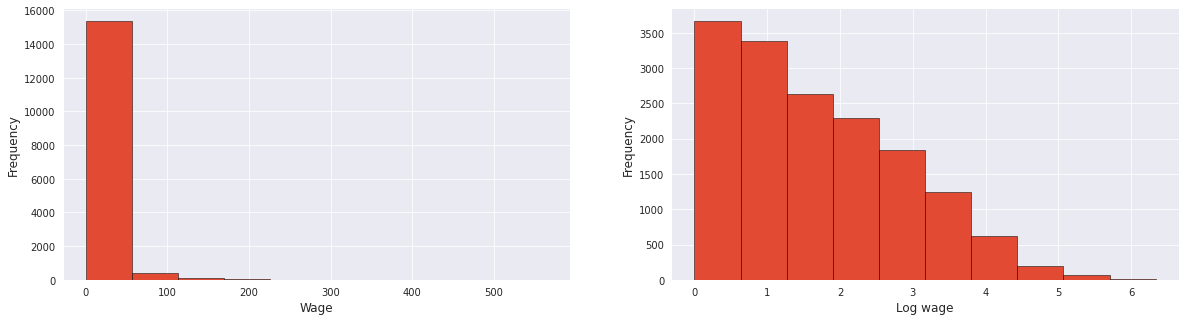

In [24]:

wage_col = no_gks["Wage log"]
fig2, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,5)) #histograms
ax1.hist(no_gks["Wage"],bins=10,edgecolor = "k"); ax1.set_xlabel("Wage"); ax1.set_ylabel("Frequency");
ax2.hist(no_gks["Wage log"],bins=10,edgecolor = "k"); ax2.set_ylabel("Frequency"); ax2.set_xlabel("Log wage")
plt.show()

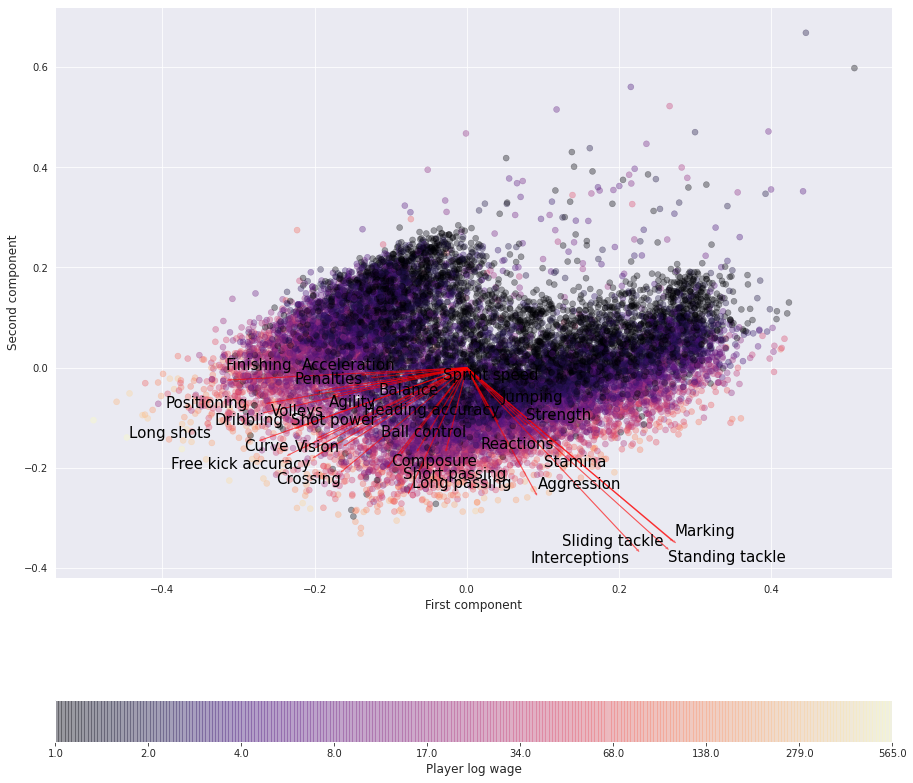

In [25]:

fig, cax = biplot(dim_reduce_fit,np.transpose(dim_reduce.components_[0:2, :]),labels=df.columns.values,color=wage_col,alpha=0.9)
ticks = np.linspace(0,wage_col.max(),10)
cbar = fig.colorbar(cax, ticks=ticks, orientation='horizontal')
cbar.ax.set_xticklabels(np.exp(ticks).round())  # horizontal colorbar
cbar.set_label("Player log wage")

plt.show()

